In [1]:
import sys

# Functions (continued)



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recursion" data-toc-modified-id="Recursion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recursion</a></span></li><li><span><a href="#Scope" data-toc-modified-id="Scope-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scope</a></span><ul class="toc-item"><li><span><a href="#Local-scope" data-toc-modified-id="Local-scope-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Local scope</a></span></li><li><span><a href="#Global-scope" data-toc-modified-id="Global-scope-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Global scope</a></span><ul class="toc-item"><li><span><a href="#the-global-statement" data-toc-modified-id="the-global-statement-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>the <code>global</code> statement</a></span></li></ul></li></ul></li><li><span><a href="#Lambda-functions" data-toc-modified-id="Lambda-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Lambda functions</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-materials" data-toc-modified-id="Further-materials-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Further materials</a></span><ul class="toc-item"><li><span><a href="#EXERCISE-(Optional)" data-toc-modified-id="EXERCISE-(Optional)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>EXERCISE (Optional)</a></span></li></ul></li></ul></div>

## Recursion

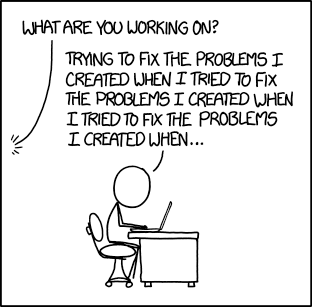

**Solution**: Build a function that returns the factorial of a number.



In [2]:
### Your code goes here

There is nothing wrong with a function calling itself (if done carefully). That concept is called **recursion** and we can define the factorial, for example, in that fashion:


In [3]:
# I know it is hard... but this is a terrific mental gym.
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

This [link](https://realpython.com/python-thinking-recursively/#pesky-details) containts a very useful viz to understand how this function works. 

Recursion is somehow elegant, but can be difficult to debug, and are probably inefficient. Furthermore, there is a limit to the depth of a recursion you can take. Each function called is stored in a [stack](https://en.wikipedia.org/wiki/Stack_(abstract_data_type)). And stacks have a limit to the number of elements they can store in memory. When you reach that limit you produced a **[StackOverflow](https://en.wikipedia.org/wiki/Stack_overflow#:~:text=The%20most%2Dcommon%20cause%20of,of%20infinite%20recursion%20in%20C.)** --- now you know what that is!

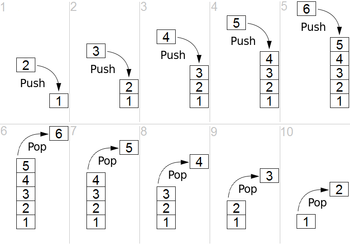

In fact one of the most common causes of producing a stack overflow is excessively deep or infinite recursion.

In [4]:
# This number is orientative... there are other things going on: 
# https://stackoverflow.com/questions/1156023/print-current-call-stack-from-a-method-in-python-code 

sys.getrecursionlimit()

3000

One example of recursive programming in the real live could be building a [decision tree](https://www.youtube.com/embed/LDRbO9a6XPU)... don´t worry. We´ll get there ;)

## Scope

In Python, when we create a variable or a function it is only available in the "region" where it was created. This is what we call `scope`


### Local scope


If a variable is created within a function, then it can only be used within that function. It is as if the function creates its own "universe" of variables.


In [5]:
def my_function():
    x = 4
    print(x)

In [6]:
# x
# my_function()

This process also works recursively

In [7]:
def my_function():
    x = 4
    def my_funtion_inside_my_function():
        print(x) 
    my_funtion_inside_my_function()

In [8]:
# x
# my_funtion_inside_my_function()
# my_function()

### Global scope

If want a variable to be accessed everywhere in our code, we create it in the main body of the code.

In [9]:
x = 4
def my_function():
    print(x)

In [10]:
# x
# my_function()

Ok... but what if...
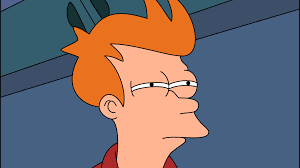

In [11]:
# x = 7
# def my_function():
#     x = 4
#     print(x)

In [12]:
# x
# my_function()

#### the `global` statement 

If you want to create or modify a global variable from a local scope, you can use the `global` keyword.

In [13]:
# del x
# def my_function():
#     global x
#     x = 9
#     print('the function has been called')

In [14]:
# x
# my_function()
# x

In [15]:
# del x

# x = 17
# def my_function():
#     global x
#     x = 9
#     print('the function has been called')

In [16]:
# x
# my_function()
# x

In general, Python resolves names using the so-called LEGB rule, which is named after the Python scope for names. The letters in LEGB stand for Local, Enclosing, Global, and Built-in. (Extracted from [here](https://realpython.com/python-scope-legb-rule/#globals))

## Lambda functions

When we create a function with the regular `def` keyword, we assign it a name.

In [17]:
my_function

<function __main__.my_function()>

In Python we can also create "anonymous" functions with the `lambda` keyword. You can think of them as "use and throw" functions.

The syntax is: `lambda arguments : expression`


In [18]:
lambda x: x

<function __main__.<lambda>(x)>

In [19]:
# How could we actually use the above expresion?

In [20]:
def regular_function():
    print('Hello World!')

In [21]:
regular_function()
regular_function

Hello World!


<function __main__.regular_function()>

In [22]:
# same with lambda
(lambda : print('Hello World!'))()

Hello World!


In [23]:
(lambda : print('Hello World!'))

<function __main__.<lambda>()>

We can also assign a `lambda` function to a name. This is not very common, unless you want something quick or witty :). Also, a lambda function can take any number of arguments.


In [24]:
division_lambda = lambda num, denom: num / denom if denom != 0 else print('just can´t do it')

division_lambda(3,0)


just can´t do it


In [25]:
# However, once a lambda always a lambda...
division_lambda

<function __main__.<lambda>(num, denom)>

**Exercise** Re-write the above function `division_lambda` using the `def` keyword

In [26]:
### Your code goes here

One possible use of lambdas is to use them inside other functions so that. For example the next function will allow us to create other functions that raise to the powers of different numbers:

In [27]:
def power(n):
    return lambda x: x ** n

**Exercise** Use the above function `power` to create another function that squares any given number

In [28]:
### Your code goes here

Ok, Ok... they do not look THAT useful. The true power of lambda functions in unleash when in combination with other functions such as `map`, `filter`, or `apply` in the pandas library. Do not, worry, will get there. For the moment just one example:

In [29]:
list_a = [2, 7, 5, 8, 2]
list_b = [6, 8, 4, 6]
list(map(lambda x,y: x*y, list_a, list_b))

[12, 56, 20, 48]

They can also be very useful inside arguments of other functions, such as sorting a dict by its values:

In [30]:
my_dict = {'a': 1, 'c':3, 'b':2, 's': 0}
sorted(my_dict.items(), key = lambda x:x[1])

[('s', 0), ('a', 1), ('b', 2), ('c', 3)]

**Exercise**: re-write the above example but this time do not use a `lambda`. Instead, write a named function to do its job

In [31]:
### Your code goes here

## Summary 


## Further materials

* [Thinking recursively in Python](https://realpython.com/python-thinking-recursively/#pesky-details)

### EXERCISE (Optional)

Extracted from "[Think Python](http://greenteapress.com/thinkpython2/html/index.html)" by Allen B. Downey 2nd Edition, Version 2.4.0.


A palindrome is a word that is spelled the same backward and forward, like “noon” and “redivider”. **Recursively, a word is a palindrome if the first and last letters are the same and the middle is a palindrome.**

The following are functions that take a string argument and return the first, last, and middle letters:



In [32]:
def first(word):
    return word[0]

def last(word):
    return word[-1]

def middle(word):
    return word[1:-1]

Write a function called `is_palindrome` that takes a string argument and returns `True` if it is a palindrome and `False` otherwise. 

For the sake of simplicity, assume the input will always be a non-empty string.

Hints: 

* Play around with the functions first, last, and middle to have a feel of what they do
* If a word has len <= 1, then it is a palindrome
* If the first and last letters are not the same, then it is not a palindrome


In [33]:
def is_palindrome(word:str) -> bool:
    pass

In [34]:
# 'seres' -> True
# 'orejero' -> True
# 'mesa' -> False

See [here](https://github.com/AllenDowney/ThinkPython2/blob/master/code/palindrome_soln.py) for the solution.